In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [2]:
df = pd.read_csv("C:/Users/hp5cd/OneDrive/Desktop/Breast_Cancer.csv")

In [3]:
df['Status'] = df['Status'].map({'Alive': 0, 'Dead': 1})

In [4]:
X = df.drop(columns=['Status'])
y = df['Status']

In [12]:
categorical_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred = model.predict(X_test_scaled)


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9043478260869565

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       685
           1       0.83      0.45      0.58       120

    accuracy                           0.90       805
   macro avg       0.87      0.72      0.76       805
weighted avg       0.90      0.90      0.89       805



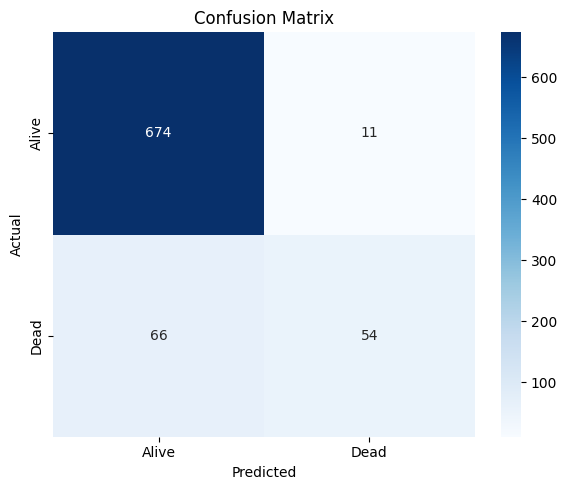

In [16]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
import seaborn as sns  

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

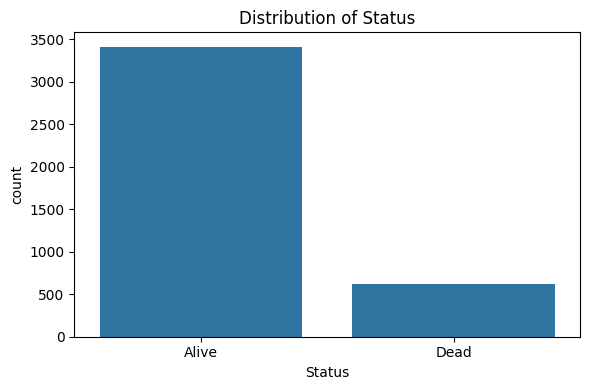

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df)
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.title('Distribution of Status')
plt.tight_layout()
plt.show()


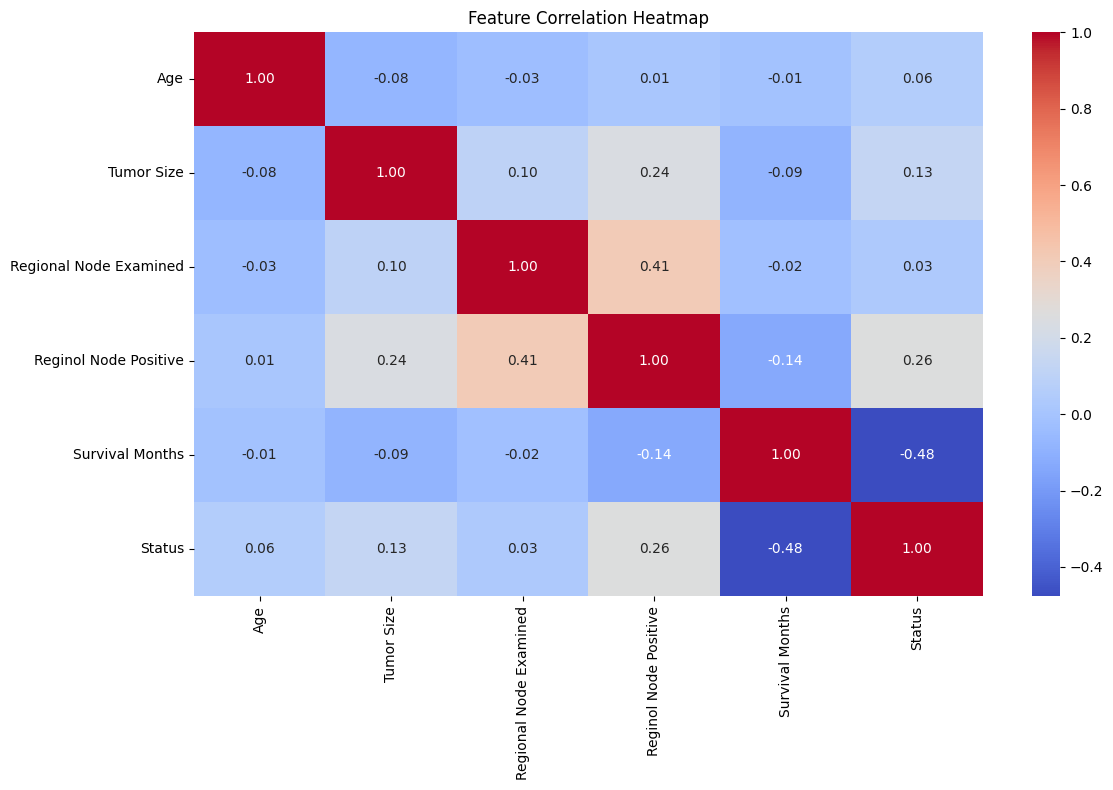

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()